In [12]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.decomposition import PCA
 from sklearn.cluster import AgglomerativeClustering
 from sklearn.preprocessing import StandardScaler, normalize
 from sklearn.metrics import silhouette_score
 import scipy.cluster.hierarchy as shc

In [13]:
 X = pd.read_csv('CC GENERAL.csv')
 # Dropping the CUST_ID column from the data
 X = X.drop('CUST_ID', axis = 1)
 # Handling the missing values
 X.fillna(method ='ffill', inplace = True)
 X.head()

C:\Users\Aniket\AppData\Local\Temp\ipykernel_25008\335167703.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method ='ffill', inplace = True)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Normalizing the data so that the data approximately follows a Gaussian distributi
X_normalized = normalize(X_scaled)
 # Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

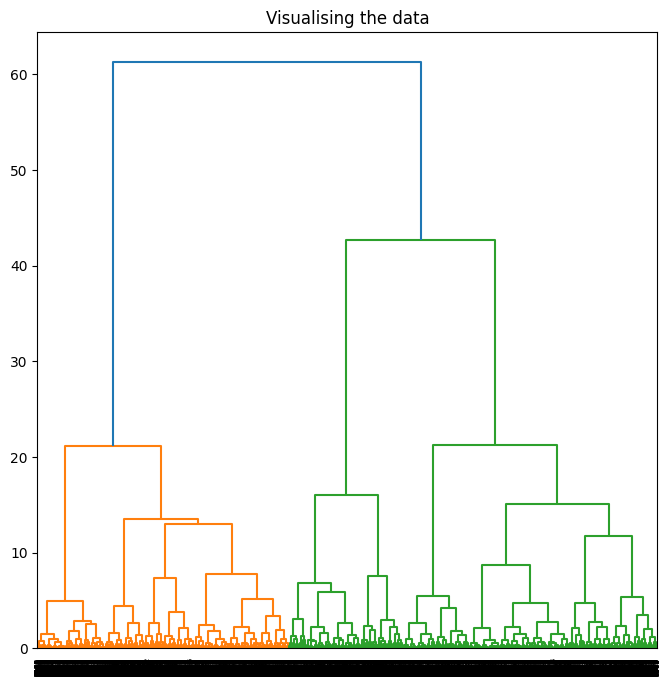

In [15]:
 pca = PCA(n_components = 2)
 X_principal = pca.fit_transform(X_normalized)
 X_principal = pd.DataFrame(X_principal)
 X_principal.columns = ['P1', 'P2']

 plt.figure(figsize =(8, 8))
 plt.title('Visualising the data')
 Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

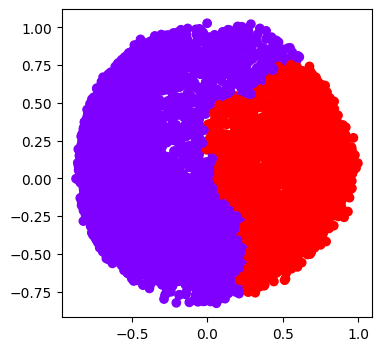

In [16]:

 ac2 = AgglomerativeClustering(n_clusters = 2)
 # Visualizing the clustering
 plt.figure(figsize =(4, 4))
 plt.scatter(X_principal['P1'], X_principal['P2'],
 c = ac2.fit_predict(X_principal), cmap ='rainbow')
 plt.show()

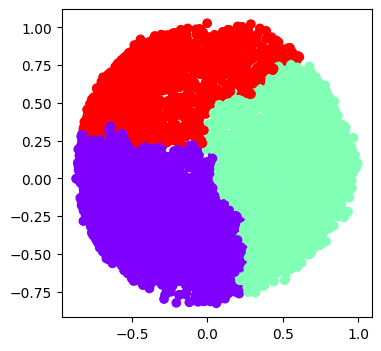

In [18]:
ac3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(4, 4))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

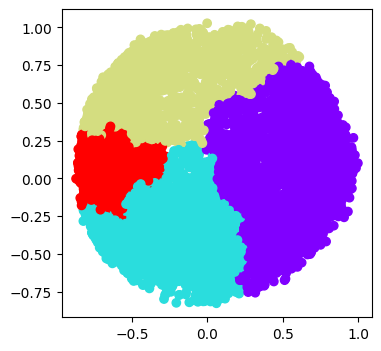

In [19]:

 ac4 = AgglomerativeClustering(n_clusters = 4)
 plt.figure(figsize =(4, 4))
 plt.scatter(X_principal['P1'], X_principal['P2'],
 c = ac4.fit_predict(X_principal), cmap ='rainbow')
 plt.show()

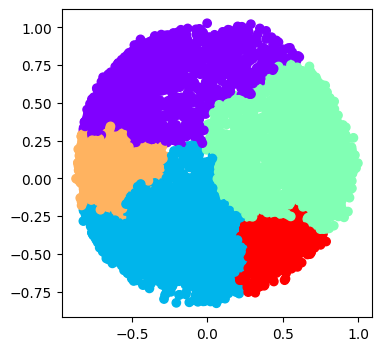

In [20]:
ac5 = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(4, 4))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

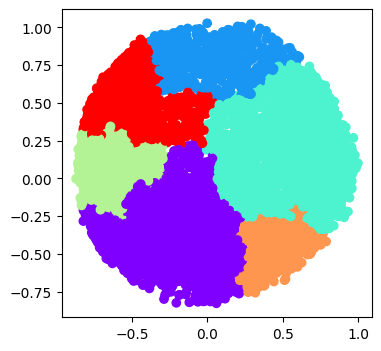

In [21]:
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize =(4, 4))
plt.scatter(X_principal['P1'], X_principal['P2'],
c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

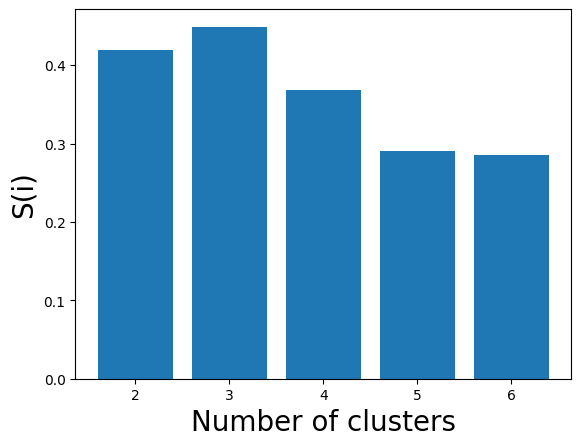

In [22]:
 k = [2, 3, 4, 5, 6]
 # Appending the silhouette scores of the different models to the list
 silhouette_scores = []
 silhouette_scores.append(
 silhouette_score(X_principal, ac2.fit_predict(X_principal)))
 silhouette_scores.append(
 silhouette_score(X_principal, ac3.fit_predict(X_principal)))
 silhouette_scores.append(
 silhouette_score(X_principal, ac4.fit_predict(X_principal)))
 silhouette_scores.append(
 silhouette_score(X_principal, ac5.fit_predict(X_principal)))
 silhouette_scores.append(
 silhouette_score(X_principal, ac6.fit_predict(X_principal)))
 # Plotting a bar graph to compare the results
 plt.bar(k, silhouette_scores)
 plt.xlabel('Number of clusters', fontsize = 20)
 plt.ylabel('S(i)', fontsize = 20)
 plt.show()
